Deserialised process graph into nested structure


Walking node root-78a7f321-a13b-4cea-a820-87b7d2601cb6
Walking node mintime-78a7f321-a13b-4cea-a820-87b7d2601cb6
Walking node min-06a03a29-d067-454e-9112-b16e482ec334
Walking node evi-78a7f321-a13b-4cea-a820-87b7d2601cb6
Walking node m3-d790a059-122b-47b6-a44f-ac74437b085d
Walking node div-d790a059-122b-47b6-a44f-ac74437b085d
Walking node sub-d790a059-122b-47b6-a44f-ac74437b085d
Walking node nir-d790a059-122b-47b6-a44f-ac74437b085d
Walking node red-d790a059-122b-47b6-a44f-ac74437b085d
Walking node sum-d790a059-122b-47b6-a44f-ac74437b085d
Walking node nir-d790a059-122b-47b6-a44f-ac74437b085d
Walking node m1-d790a059-122b-47b6-a44f-ac74437b085d
Walking node red-d790a059-122b-47b6-a44f-ac74437b085d
Walking node m2-d790a059-122b-47b6-a44f-ac74437b085d
Walking node blue-d790a059-122b-47b6-a44f-ac74437b085d
Walking node load_collection-78a7f321-a13b-4cea-a820-87b7d2601cb6


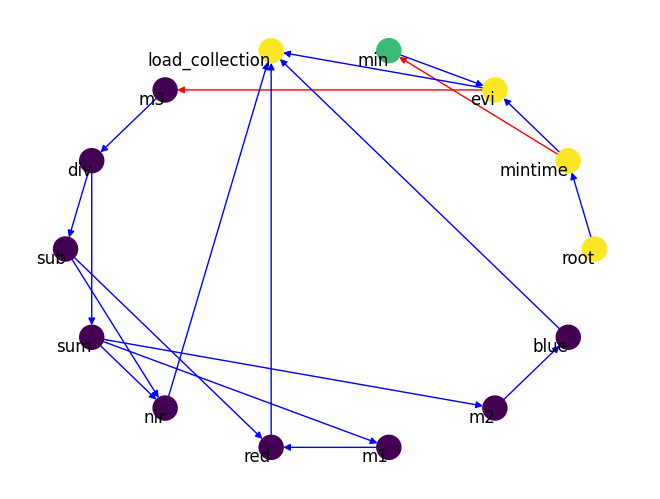

In [1]:
from eodc_pg_parser.graph import OpenEOProcessGraph
import json

flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)

parsed_graph.plot()

## Executor

In [2]:
from eodc_pg_parser.executor import OpenEOExecutor
from eodc_pg_parser.process_registry import process_registry

executor = OpenEOExecutor(parsed_graph=parsed_graph, process_registry=process_registry)

In [4]:
lc_func = executor._map_node_to_callable("load_collection-78a7f321-a13b-4cea-a820-87b7d2601cb6")
sr_func = executor._map_node_to_callable("root-78a7f321-a13b-4cea-a820-87b7d2601cb6")



In [ ]:
lc_func()

Ran load_collection with kwargs: {'kwargs': {'id': 'Sentinel-2', 'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}, 'temporal_extent': ['2018-01-01', '2018-02-01'], 'bands': ['B02', 'B04', 'B08']}}


In [6]:
sr_func()

Ran load_collection with kwargs: {'kwargs': {'id': 'Sentinel-2', 'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2}, 'temporal_extent': ['2018-01-01', '2018-02-01'], 'bands': ['B02', 'B04', 'B08']}}
Ran reduce_dimension with kwargs: {'kwargs': {'data': 'load_collection', 'dimension': 'bands', 'reducer': <function OpenEOExecutor._map_node_to_callable.<locals>.run at 0x7f5a4e806040>}}
Ran array_element with kwargs: {'kwargs': {'data': 'load_collection', 'label': 'B08'}}
Ran array_element with kwargs: {'kwargs': {'data': 'load_collection', 'label': 'B04'}}
Ran subtract with kwargs: {'kwargs': {'x': 'array_element', 'y': 'array_element'}}
Ran multiply with kwargs: {'kwargs': {'x': '6', 'y': 'array_element'}}
Ran array_element with kwargs: {'kwargs': {'data': 'load_collection', 'label': 'B02'}}
Ran multiply with kwargs: {'kwargs': {'x': '-7.5', 'y': 'array_element'}}
Ran sum with kwargs: {'kwargs': {'data': [1, 'array_element', 'multiply', 'multiply']}}
Ran divide 

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    message:  load_collection

## Test if xarrays can be memoised

In [ ]:
import xarray as xr
from functools import cache
from pyrsistent import freeze

In [ ]:

@cache
def run_func(data: xr.Dataset):
    print("ran")
    return data


In [ ]:
run_func(freeze(xr.Dataset()))

TypeError: unhashable type: 'Dataset'